Se agrego Power Bi Actualizado 9122023

   Unnamed: 0                       id                   seccion  \
0           0  BUENOS AIRES_25 DE MAYO  25 De Mayo, Buenos Aires   
1           1  BUENOS AIRES_9 DE JULIO  9 De Julio, Buenos Aires   

  agrupacion_ganadora  LA LIBERTAD AVANZA_perc  UNION POR LA PATRIA_perc  \
0  LA LIBERTAD AVANZA                    63.72                     36.28   
1  LA LIBERTAD AVANZA                    63.97                     36.03   

   LA LIBERTAD AVANZA_votos  UNION POR LA PATRIA_votos  Participacion  \
0                     14530                       8272          73.87   
1                     20408                      11495          76.24   

   electores  votantes BLANCO_perc  IMPUGNADO_perc  NULO_perc  BLANCO_votos  \
0      31823     23508        1.44            0.06       1.50           339   
1      43181     32921        1.72            0.03       1.35           566   

   IMPUGNADO_votos  
0               15  
1                9  
<class 'pandas.core.frame.DataFrame'>
RangeIn

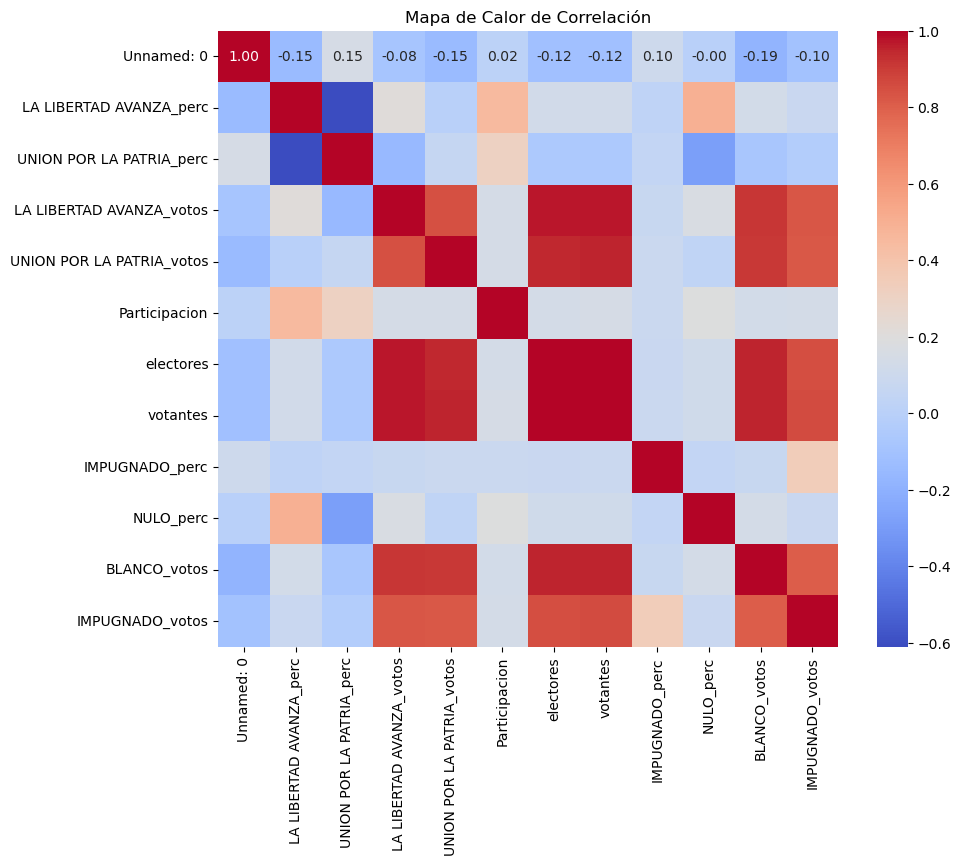

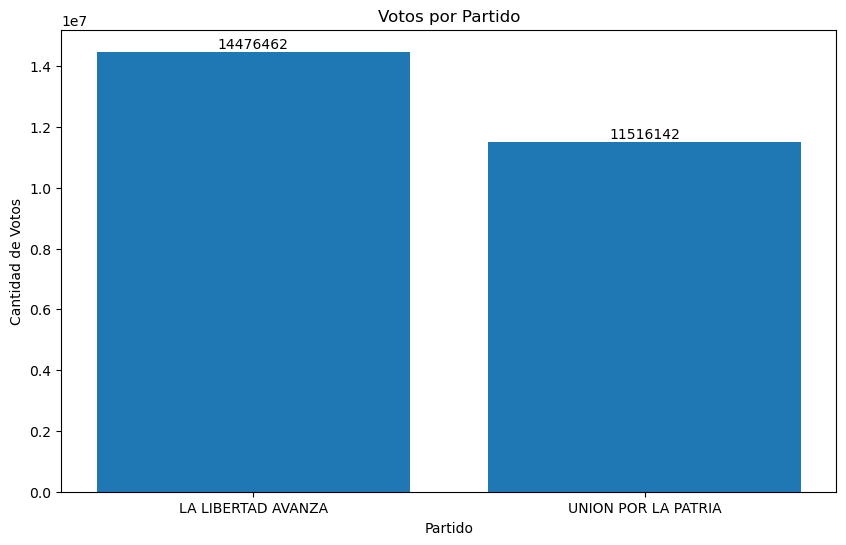

                                  LA LIBERTAD AVANZA_votos  \
seccion                                                      
Capital, Cordoba                                    614786   
La Matanza, Buenos Aires                            303672   
Rosario, Santa Fe                                   434442   
La Plata, Buenos Aires                              208515   
General Pueyrredon, Buenos Aires                    223162   
...                                                    ...   
Susques, Jujuy                                           0   
Santa Victoria, Salta                                    0   
Curaco, La Pampa                                         0   
Florentino Ameghino, Chubut                              0   
Gastre, Chubut                                           0   

                                  UNION POR LA PATRIA_votos  Total de Votos  
seccion                                                                      
Capital, Cordoba                     

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
ruta_archivo = 'BALLOTAGE 2023/NIVEL NACIONAL/ballotage2023_resultados_x_seccion.csv'
data = pd.read_csv(ruta_archivo, sep=',')

# Inspeccionar los datos
print(data.head(2))
print(data.info())
print(data.describe())
print(data.columns)

# Sumar los votos de cada agrupación
votos_libertad_avanza = data['LA LIBERTAD AVANZA_votos'].sum()
votos_union_patria = data['UNION POR LA PATRIA_votos'].sum()

# Mostrar los resultados
print("Votos para 'LA LIBERTAD AVANZA':", votos_libertad_avanza)
print("Votos para 'UNION POR LA PATRIA':", votos_union_patria)

# Conteo de valores únicos en la columna 'agrupacion_ganadora'
print(data['agrupacion_ganadora'].value_counts())

# Verificar y sumar los valores nulos por columna
print(data.isnull().sum())

# Seleccionar solo columnas numéricas para calcular la correlación
columnas_numericas = data.select_dtypes(include=['float64', 'int64'])
correlaciones = columnas_numericas.corr()
print(correlaciones)

# Crear un mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

# Obtener el conteo de votos por partido
partidos = ['LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']
votos = [votos_libertad_avanza, votos_union_patria]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(partidos, votos)

# Agregar etiquetas con el número exacto de votos encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval)}", ha='center', va='bottom')

plt.title('Votos por Partido')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Votos')
plt.show()

# Sumar los votos por sección para cada agrupación
votos_por_seccion = data.groupby('seccion')[['LA LIBERTAD AVANZA_votos', 'UNION POR LA PATRIA_votos']].sum()

# Ordenar por el total de votos de mayor a menor
votos_por_seccion['Total de Votos'] = votos_por_seccion.sum(axis=1)
votos_por_seccion = votos_por_seccion.sort_values(by='Total de Votos', ascending=False)

# Mostrar la tabla de votos por sección para cada agrupación
print(votos_por_seccion)

# Exportar la tabla de votos por sección a un archivo CSV
votos_por_seccion.to_csv('votos_por_seccion.csv', index=True)

# Dividir la columna 'id' en dos columnas usando '_' como separador
data[['Provincia', 'Localidad']] = data['id'].str.split('_', n=1, expand=True)

# Mostrar el DataFrame resultante con las columnas separadas
print(data)

# Agrupar por 'Provincia' y sumar los votos de cada lista por separado
suma_votos_lista_1 = data.groupby('Provincia')['UNION POR LA PATRIA_votos'].sum().reset_index()
suma_votos_lista_2 = data.groupby('Provincia')['LA LIBERTAD AVANZA_votos'].sum().reset_index()

# Guardar los resultados en archivos CSV
suma_votos_lista_1.to_csv('suma_votos_lista_1.csv', index=False)
suma_votos_lista_2.to_csv('suma_votos_lista_2.csv', index=False)